In [1]:
from preset_mdl import preset_mdl  # 导入 preset_mdl.py 中的函数
from preset_pr import preset_pr  # 导入 preset_pr.py 中的函数
from signal_source import signal_source  # 导入 signal_source.py 中的函数
from RISCA_core import RISCA_core  # 导入 RISCA_core.py 中的函数
from analyser.analyser import AnalyserSar  # 导入 AnalyserSar 类
import pandas as pd  # 导入 pandas 库

In [2]:
# %matplotlib inline
# %pip install jinja2
mdl = preset_mdl()
pr = preset_pr()
# pr['conf_name'] = input('配置文件名: sar/tisar/nssar1o1c/noisar1o1ccp/pipesar2s/...')
cfg_info = pd.DataFrame(pr["T_assembler"])
styled_df = cfg_info.style\
            .set_table_attributes('class="dataframe table table-striped"')\
            .set_properties(**{'text-align': 'center'})\
            .set_caption(f'Configuration Information for {pr["conf_name"]}')
styled_df

Loading file: ..\config\sar\timing_table.xlsx
[util.load_assembler_xlsx] TI parameter loaded: pr["TI"]= 1
Loaded Excel configuration:


,frame1,frame2,frame3
Item,,,
CB1,OUT RST SAM1,MSB,LSB


offset_nocal = -4.83 LSB


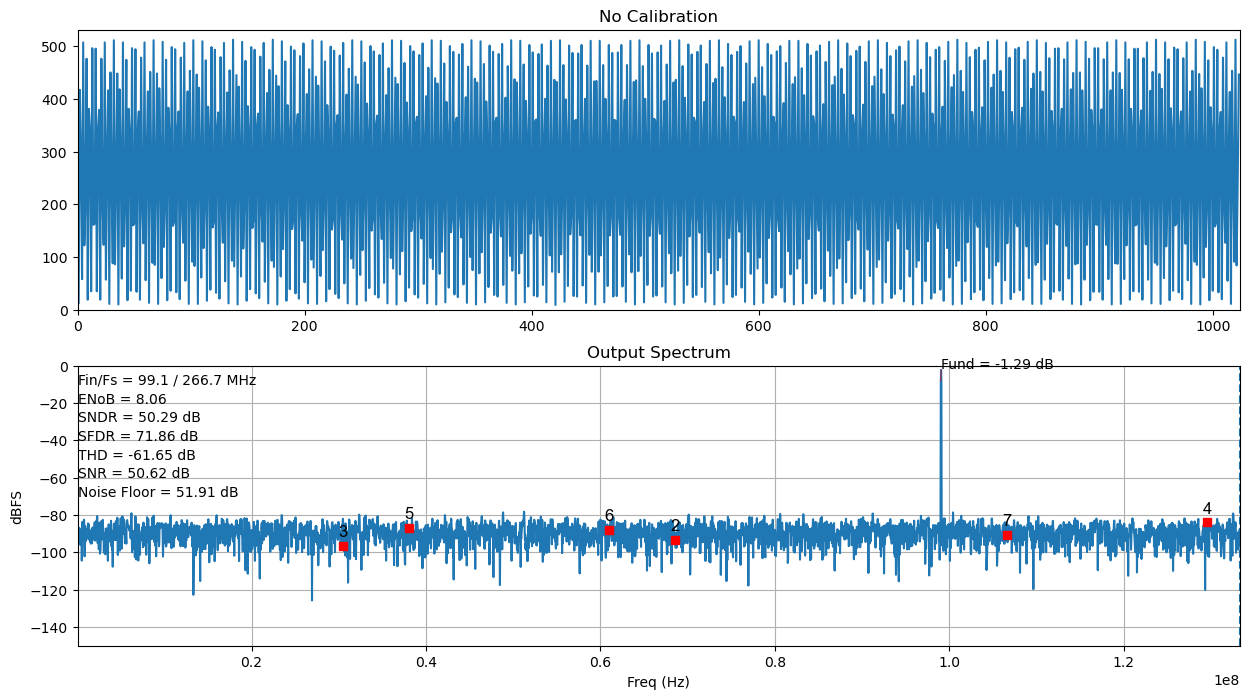

In [3]:
# 定义输入信号峰值
v_in_peak = [0.85, 0]
# 调用 signal_source 函数
v_in_p, v_in_n = signal_source(pr, mdl, v_in_peak)

# Instantiate the device under test
da = RISCA_core(mdl, pr, v_in_p, v_in_n)

# run analysis
test = AnalyserSar(da, pr)
test.no_calibration()